# __Running Modes__

In [35]:
MODE = 'interactive' # uses only 0.01 % of the whole dataset
#MODE = 'full' # uses the whole dataset

LOAD_PARQUET = 0 # 0: disables, 1: enables loading of parquet files

# __0. Kaggle Competition__: Google - Isolated Sign Language Recognition

https://www.kaggle.com/competitions/asl-signs

## __Overview__

### __Description__

#### __Goal of the Competition__

The goal of this competition is to classify isolated American Sign Language (ASL) signs. You will create a [TensorFlow Lite](https://www.tensorflow.org/lite) model trained on labeled landmark data extracted using the [MediaPipe Holistic Solution](https://google.github.io/mediapipe/solutions/holistic.html).

Your work may improve the ability of PopSign* to help relatives of deaf children learn basic signs and communicate better with their loved ones.^

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/jcyWo_1Q_jY/0.jpg)](https://www.youtube.com/watch?v=jcyWo_1Q_jY)

#### __Context__

##### __Every day, 33 babies are born with permanent hearing loss in the U.S.__

Around 90% of which are born to hearing parents many of which may not know American Sign Language. (kdhe.ks.gov, deafchildren.org) Without sign language, deaf babies are at risk of Language Deprivation Syndrome. This syndrome is characterized by a lack of access to naturally occurring language acquisition during their critical language-learning years. It can cause serious impacts on different aspects of their lives, such as relationships, education, and employment.

##### __Learning sign language is challenging.__

Learning American Sign Language is as difficult for English speakers as learning Japanese. (jstor.org) It takes time and resources, which many parents don't have. They want to learn sign language, but it's hard when they are working long hours just to make ends meet. And even if they find the time and money for classes, the classes are often far away.

##### __Games can help.__

PopSign is a smartphone game app that makes learning American Sign Language fun, interactive, and accessible. Players match videos of ASL signs with bubbles containing written English words to pop them.
PopSign is designed to help parents with deaf children learn ASL, but it's open to anyone who wants to learn sign language vocabulary. By adding a sign language recognizer from this competition, PopSign players will be able to sign the type of bubble they want to shoot, providing the player with the opportunity to practice the sign themselves instead of just watching videos of other people signing.

##### __You can help connect deaf children and their parents.__

By training a sign language recognizer for PopSign, you can help make the game more interactive and improve the learning and confidence of players who want to learn sign language to communicate with their loved ones.

##### __Why TensorFlow Lite__

To allow the ML model to run on device in an attempt to limit latency inside the game, PopSign doesn’t send user videos to the cloud. Therefore, all inference must be done on the phone itself. PopSign is building its recognition pipeline on top of TensorFlow Lite, which runs on both Android and iOS. In order for the competition models to integrate seamlessly with PopSign, we are asking our competitors to submit their entries in the form of TensorFlow Lite models.

##### __Special thanks to our partners__

We’d like to thank the Georgia Institute of Technology, the National Technical Institute for the Deaf at Rochester Institute of Technology, and Deaf Professional Arts Network for their work to create the dataset, the PopSign game, and overall competition preparation.

| This is a Code Competition. Refer to [Code Requirements](https://kaggle.com/competitions/asl-signs/overview/code-requirements) for details |
|--------------------------------------------------------------------------------------------------------------------------------------------|

**PopSign is an app developed by the Georgia Institute of Technology and the National Technical Institute for the Deaf at Rochester Institute of Technology. The app is available in beta on Android and iOS.*

^*We cannot guarantee the competition will benefit the competitors or the disabled community directly.*

### __Evaluation__

The evaluation metric for this contest is simple classification __accuracy__.

#### __Submission Process__

In this competition you will be submitting a TensorFlow Lite model file. The model must take one or more landmark frames as an input and return a float vector (the predicted probabilities of each sign class) as the output. Your model must be packaged into a `submission.zip` file and compatible with the [TensorFlow Lite Runtime v2.9.1](https://www.tensorflow.org/lite/guide/python#run_an_inference_using_tflite_runtime). You are welcome to train your model using the framework of your choice, as long as you convert the model checkpoint into the tflite format prior to submission.

Your model must also perform inference with less than 100 milliseconds of latency per video on average and use less than 40 MB of storage space. Expect to see approximately 40,000 videos in the test set. We allow an additional 10 minute buffer for loading the data and miscellaneous overhead.

Each video is loaded with the following function:

```python
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)
```

Inference is performed (roughly) as follows, ignoring details like how we manage multiple videos:

```python
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path)

found_signatures = list(interpreter.get_signature_list().keys())

if REQUIRED_SIGNATURE not in found_signatures:
    raise KernelEvalException('Required input signature not found.')

prediction_fn = interpreter.get_signature_runner("serving_default")
output = prediction_fn(inputs=frames)
sign = np.argmax(output["outputs"])
```

### __Timeline__

- __February 23, 2023__ - Start Date.

- __April 25, 2023__ - Entry Deadline. You must accept the competition rules before this date in order to compete.

- __April 25, 2023__ - Team Merger Deadline. This is the last day participants may join or merge teams.

- __May 2, 2023__ - Final Submission Deadline.

All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. The competition organizers reserve the right to update the contest timeline if they deem it necessary.

### __Prizes__

* 1st Place - $50,000
* 2nd Place - $20,000
* 3rd Place - $10,000
* 4th Place - $10,000
* 5th Place - $10,000

### __Code Requirements__

#### __This is a Code Competition__

Submissions to this competition must be made through Notebooks. In order for the "Submit" button to be active after a commit, the following conditions must be met:

* CPU Notebook <= 9 hours run-time
* GPU Notebook <= 9 hours run-time
* Internet access disabled
* Freely & publicly available external data is allowed, including pre-trained models
* Submission file must be named submission.zip.

Please see the Code [Competition FAQ](https://www.kaggle.com/docs/competitions#notebooks-only-FAQ) for more information on how to submit. And review the [code debugging doc](https://www.kaggle.com/code-competition-debugging) if you are encountering submission errors.

### __Acknowledgements__

The dataset provided by Deaf Professional Arts Network and the Georgia Institute of Technology is licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). Kaggle and Google do not own and have not validated the dataset in any way.

### __Data Card__

#### __Dataset Card for the Isolated Sign Language Recognition Corpus__

##### __Dataset Summary__

The Isolated Sign Language Recognition corpus (version 1.0) is a collection of hand and facial landmarks generated by Mediapipe version 0.9.0.1 on ~100k videos of isolated signs performed by 21 Deaf signers from a 250-sign vocabulary.

##### __Supported Tasks and Leaderboards__

https://www.kaggle.com/competitions/asl-signs/leaderboard

##### __Languages__

American Sign Language

#### __Dataset Structure__

##### __Data Instances__

{'frame': 27, 'row_id': '27-face-0', 'type': 'face', 'landmark_index': 0, 'x': 0.4764270484447479, 'y': 0.3772650957107544, 'z': -0.05066078156232834}

##### __Data Fields__

See https://www.kaggle.com/competitions/asl-signs/data

##### __Data Splits__

Not applicable.

#### __Dataset Creation__

##### __Curation Rationale__

The signs in the dataset represent 250 of the first concepts taught to infants in any language. The goal is to create an isolated sign recognizer to incorporate into educational games for helping hearing parents of Deaf children learn American Sign Language (ASL). Around 90% of deaf infants are born to hearing parents, many of whom may not know American Sign Language. (kdhe.ks.gov, deafchildren.org). Surrounding Deaf children with sign helps avoid Language Deprivation Syndrome. This syndrome is characterized by a lack of access to naturally occurring language acquisition during the critical language-learning years. It can cause serious impacts on different aspects of their lives, such as relationships, education, and employment.

Learning American Sign Language (ASL) is as difficult for English speakers as learning Japanese (jstor.org). It takes time and resources that many parents don't have. They want to learn sign language, but it's hard when they are working long hours just to make ends meet. And even if they find the time and money for classes, the classes are often far away. 
PopSign is a smartphone game app that makes learning American Sign Language fun, interactive, and accessible. Currently, players match videos of ASL signs with bubbles containing written English words to pop the bubbles and advance game play.
By adding isolated sign language recognition to Popsign, parents will play the game by making the signs instead of watching videos of signing. This sort of expressive practice improves confidence for communicating with Deaf children and the Deaf community.

##### __Source Data__

###### __Initial Data Collection and Normalization__

Signers who communicate using American Sign Language as their primary language were recruited from across the United States. They were shipped a Pixel 4a smartphone with an installed collection app. The app prompted the signer with the concept in English to sign, randomly selected from the 250-sign vocabulary. Signers pressed and held an on-screen button on the phone to record video while signing each concept, releasing the button after each sign. The video of the sign is extracted with a buffer 0.5 seconds before the press of the button and 0.5 seconds after the release of the button. This method of video collection matches the game interface where players touch the screen to aim a bubble and release the touch after they have finished signing.

While the app provided a video example of the sign desired, signers routinely made variants of the sign based on their background and region. More rarely, signers might fingerspell a sign, miss it completely, or produce the wrong sign. Extraneous movements, such as scratching an itch, or the ending movement from the previous sign or the onset of the next sign, are sometimes included. Conversely, some signers pressed the button late or released the button early, causing cropping in some sign examples. Some signers sign with their left hand; others sign with their right. Some signers switch their signing hand. All of these situations must be handled by the game’s recognition system.

While the game includes 250 signs, it only needs to distinguish between five signs at a time due to the game design. Since accuracy increases as vocabulary decreases, even a recognition system with 60% accuracy on the 250-sign task should perform well when distinguishing between five signs.

###### __Who are the source language producers?__

21 signers recruited by the Deaf Professional Arts Network provided the sign. They are from many regions across the United States and all use American Sign Language as their primary form of communication. They represent a mix of skin tones and genders.

##### __Annotations__

###### __Annotation process__

Each video was annotated at creation time by the smartphone app. Videos were coarsely reviewed to attempt to remove poor recordings, but little judgment was made on the correctness or quality of the sign itself.

###### __Who are the annotators?__

Researchers at the Georgia Institute of Technology coarsely reviewed the individual videos.

##### __Personal and Sensitive Information__

The landmark data has been de-identified. Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

#### __Considerations for Using the Data__

##### __Social Impact of Dataset__

The Isolated Sign Language Recognition corpus (version 1.0), which contains Mediapipe landmarks only, will be used to create sign language recognition systems for Popsign, an educational game that encourages hearing parents of deaf infants to practice their ASL signing. The same dataset can be used to add signing to other games. For example, one proposed use is to create a game that allows Deaf children to practice their written English skills. The video set upon which the corpus is based is being used to examine variations in signing and provide examples of those variations for the wider Deaf community.

##### __Discussion of Biases__

While ASL is the most common sign language used in the United States, there are many sign languages, including British Sign Language, Native American Sign Languages, Hawaiian Sign Language, French Sign Language, and Signed Exact English. In addition, there are many regional and cultural accents associated with sign in the United States, including Black Sign Language. This dataset focuses on American Sign Language, but it does not capture a representative sample of all the sign variations that would be commonly understood in conversation. ASL has a grammar that is very different from English, and isolated signs do not capture the variation that occurs when a concept is signed in context. A larger number of signers is necessary to better represent skin tones, hand features, and different levels of signing dexterity.

##### __Other Known Limitations__

This isolated sign dataset is intended to help create educational games for teaching ASL, and is not appropriate for other purposes such as ASL-to-English translation or natural language interfaces for computers.

#### __Additional Information__

##### __Dataset Curators__

The Deaf Professional Arts Network (DPAN), is a 501(c)(3) non-profit founded in 2006 to make music, entertainment, and media accessible. The Georgia Institute of Technology is a top-10 public research university committed to improving the human condition through advanced science and technology. The National Technical Institute for the Deaf is one of the nine colleges of the Rochester Institute of Technology and is home to the world’s first and largest technological college for deaf and hard-of-hearing students.

##### __Licensing Information__

The dataset provided by Deaf Professional Arts Network and the Georgia Institute of Technology is licensed under CC-BY.

##### __Citation Information__

See the bottom of the Kaggle competition overview page for citation information.

##### __Contributions__

Thanks to the staff at DPAN and the students and faculty at Georgia Tech and NTID who make Popsign and this dataset possible.

—-

## __Data__

### __Dataset Description__

Deaf children are often born to hearing parents who do not know sign language. Your challenge in this competition is to help identify signs made in processed videos, which will support the development of mobile apps to help teach parents sign language so they can communicate with their Deaf children.

This competition requires submissions to be made in the form of [TensorFlow Lite models](https://www.tensorflow.org/lite). You are welcome to train your model using the framework of your choice as long as you convert the model checkpoint into the tflite format prior to submission. Please see [the evaluation page](https://www.kaggle.com/competitions/asl-signs/overview/evaluation) for details.

##### __train_landmark_files/[participant_id]/[sequence_id].parquet__

The landmark data. The landmarks were extracted from raw videos with the [MediaPipe holistic model](https://google.github.io/mediapipe/solutions/holistic.html). Not all of the frames necessarily had visible hands or hands that could be detected by the model. 

*Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.*

- `frame` - The frame number in the raw video.
- `row_id` - A unique identifier for the row.
- `type` - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
- `landmark_index` - The landmark index number. Details of the hand landmark locations can be found here.
- `[x/y/z]` - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.



##### [__train.csv__](../data/asl-signs/train.csv)

- `path` - The path to the landmark file.
- `participant_id` - A unique identifier for the data contributor.
- `sequence_id` - A unique identifier for the landmark sequence.
- `sign` - The label for the landmark sequence.

##### [__sign_to_prediction_index_map.json__ (3.35 kB)](../data/asl-signs/sign_to_prediction_index_map.json)

```bash
kaggle competitions download -c asl-signs
```

# 1. Domain Knowledge

## Sign Language
### Basics
### Global statistics
### Teaching and Learning
### Social Impact
### Mobile Apps
### Kaggle


# Imports

In [36]:
# general
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for loading .json dictionary
import json


# 2. Data Mining

The whole data from the Kaggle competition was downloaded from here: https://www.kaggle.com/competitions/asl-signs/data inside the `data/asl-signs` folder of this repository. 

Here, you can find a

- `sign_to_prediction_index_map.json` file, containing a dictionary of all available signs (string) with their corresponding categorical values (numeric)
- `train.csv` file, which is a list of all recorded sequences (single word signing) with some basic information
- `train_landmark_files` folder containing subfolders for each participant, which then contain all the parquet files (one parquet file corresponds to one sequence)

In the following, we will first conduct data science on the `train.csv` file. Then, based on our findings, we will look at all the parquet files and use them for finding a best sign language action detection model. 

---
# The train.csv files

## 1. General Info

- `path` - The path to the landmark file.
- `participant_id` - A unique identifier for the data contributor.
- `sequence_id` - A unique identifier for the landmark sequence.
- `sign` - The label for the landmark sequence.

## 2. Load data

Let's load the train.csv file. 

In [37]:
# load train.csv file into a dataframe
if MODE == 'full': 
    df_csv = pd.read_csv('../data/asl-signs/train.csv')
if MODE == 'interactive': 
    df_csv = pd.read_csv('../data/train_sub94.csv')
df_csv.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/27610/561476403.parquet,27610,561476403,refrigerator
1,train_landmark_files/62590/1601341273.parquet,62590,1601341273,pizza
2,train_landmark_files/27610/11345226.parquet,27610,11345226,ear
3,train_landmark_files/22343/2474751636.parquet,22343,2474751636,girl
4,train_landmark_files/62590/231359756.parquet,62590,231359756,mad


## 3. Data Cleaning

### Check for `null` values

In [38]:
df_csv.isnull().sum()

path              0
participant_id    0
sequence_id       0
sign              0
dtype: int64

We don't have any `null` values :)

### Check for `na` values

In [39]:
df_csv.isna().sum()

path              0
participant_id    0
sequence_id       0
sign              0
dtype: int64

We don't have any `na` values :)

### Check for duplicates

In [40]:
df_csv.duplicated().sum()

0

We don't have any duplicates in our data :)

## 4. Exploratory Data Analysis

### Summary

This file includes a list of all recorded sequences. Each row denotes one sequence and has information about participant_id and target sign.

* We have around **95000 sequences**.
* They show **250 signs**. Each sign is shown approximately 300 to 400 times.
* The sequences were recorded by **21 participants**. Each participant contributed 3500 to 5000 sequences. 

We add the label numbers to the signs in a column called **"target"**.

* There are no duplicate rows. 
* There are no missing values.

### `.shape`

In [41]:
df_csv.shape

(94, 4)

We have 94477 rows and 4 columns of data. 

### `.info()`

In [42]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94 non-null     object
 1   participant_id  94 non-null     int64 
 2   sequence_id     94 non-null     int64 
 3   sign            94 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


The column names are `path` (object), `participant_id` (int64), `sequence_id` (int64) and `sign` (object). 

### 94477 unique `path`s

In [43]:
df_csv.path.unique().shape[0]


94

In [44]:
df_csv.path.unique()[0] # example path from first row 

'train_landmark_files/27610/561476403.parquet'

We have 94477 unique paths (equal to the number of rows) for parquet files, which means that each row has a corresponding parquet file. 

### 94477 unique `sequence_id`s

In [45]:
df_csv.sequence_id.unique().shape[0]


94

We also have 94477 unique `sequence_id`s (equal to the number of rows), which means that each row corresponds to a single sequence. 

Thus, each parquet file in `path` corresponds to a certain sequence in `sequence_id`. 

### 21 unique `participant_id`s

In [46]:
df_csv.participant_id.unique().shape[0]


21

There are 21 unique participant IDs in our dataset, which are: 

In [47]:
pd.DataFrame(df_csv.participant_id.unique(), columns=['participant_id'])

,participant_id
0,27610
1,62590
2,22343
3,49445
4,34503
5,25571
6,55372
7,36257
8,53618
9,2044


### 250 unique `sign`s

In [48]:
df_csv.sign.unique().shape[0]


80

There are 250 unique signs in our dataset, which are: 

In [49]:
print(df_csv.sign.unique())

['refrigerator' 'pizza' 'ear' 'girl' 'mad' 'police' 'milk' 'cheek' 'story'
 'frog' 'lion' 'talk' 'not' 'pretend' 'wait' 'boy' 'book' 'room' 'puppy'
 'like' 'nose' 'bedroom' 'later' 'every' 'cow' 'puzzle' 'underwear'
 'minemy' 'yucky' 'cat' 'smile' 'quiet' 'thankyou' 'sun' 'nap' 'person'
 'why' 'wake' 'face' 'on' 'helicopter' 'sleep' 'open' 'animal' 'bug'
 'into' 'gift' 'find' 'cut' 'orange' 'pig' 'yourself' 'yellow' 'lips'
 'morning' 'aunt' 'arm' 'tomorrow' 'balloon' 'moon' 'hair' 'kitty' 'bath'
 'make' 'after' 'closet' 'bed' 'grandma' 'fast' 'donkey' 'old' 'shirt'
 'better' 'grass' 'close' 'where' 'will' 'cowboy' 'boat' 'carrot']


### Average 378 sequences per sign

In [50]:
df_csv[['sign', 'sequence_id']].groupby('sign').count().sort_values(by='sequence_id').head()

,sequence_id
sign,
after,1
person,1
open,1
on,1
old,1


In [51]:
df_csv[['sign', 'sequence_id']].groupby('sign').count().sort_values(by='sequence_id').tail()

,sequence_id
sign,
orange,2
talk,2
yucky,2
ear,3
mad,3


<AxesSubplot:xlabel='sign'>

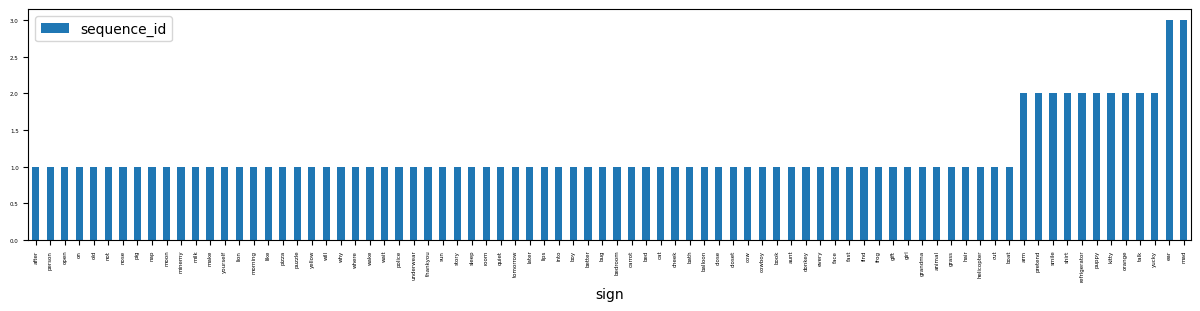

In [52]:
df_csv[['sign', 'sequence_id']].groupby('sign').count().sort_values(by='sequence_id').plot(kind='bar', figsize=(15,3), fontsize=4)

In [53]:
df_csv[['sign', 'sequence_id']].groupby('sign').count().sort_values(by='sequence_id').describe()

,sequence_id
count,80.000000
mean,1.175000
std,0.443661
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


We have between 300 to 400 recorded total sequences for each sign. 

### Average 4499 sequences per participant

In [54]:
df_csv[['participant_id', 'sequence_id']].groupby('participant_id').count().sort_values(by='sequence_id').head()

,sequence_id
participant_id,
28656,1
29302,1
61333,1
4718,2
18796,2


<AxesSubplot:xlabel='participant_id'>

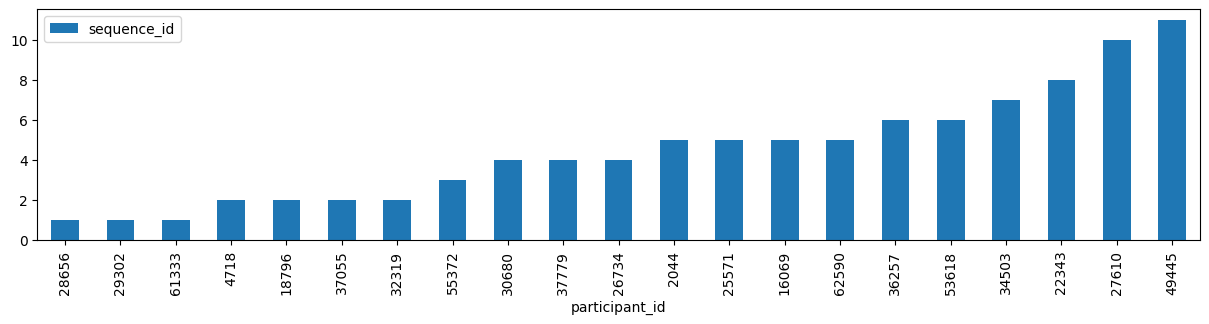

In [55]:
df_csv[['sequence_id', 'participant_id']].groupby('participant_id').count().sort_values(by='sequence_id').plot(kind='bar', figsize=(15,3))

In [56]:
df_csv[['sequence_id', 'participant_id']].groupby('participant_id').count().sort_values(by='sequence_id').describe()

,sequence_id
count,21.000000
mean,4.476190
std,2.839349
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,11.000000


All participants signed well over 3000 sequences and most participants recorded even over 4000 sequences. 

### Some missing signs for two participants 30680 and 25571

In [57]:
df_csv[['participant_id', 'sign']].groupby('participant_id').nunique().sort_values(by='sign').head()

,sign
participant_id,
28656,1
29302,1
61333,1
4718,2
18796,2


<AxesSubplot:xlabel='participant_id'>

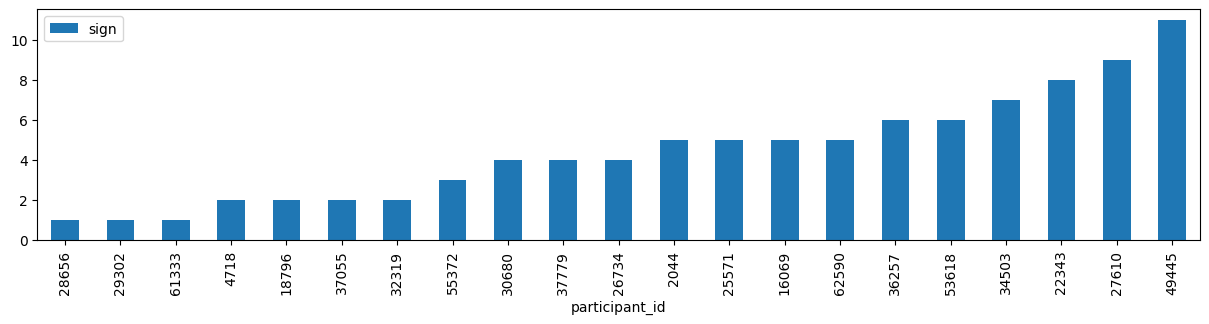

In [58]:
df_csv[['participant_id', 'sign']].groupby('participant_id').nunique().sort_values(by='sign').plot(kind='bar', figsize=(15,3))

In [59]:
df_csv[['participant_id', 'sign']].groupby('participant_id').nunique().sort_values(by='sign').describe()

,sign
count,21.000000
mean,4.428571
std,2.749026
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,11.000000


In our dataset some signs are not available from participants 30680 and 25571. 

For participant 30680 following signs are missing: 

In [60]:
set(df_csv.sign.unique()).difference(set(df_csv[df_csv.participant_id == 30680].sign.unique()))

{'after',
 'animal',
 'arm',
 'aunt',
 'balloon',
 'bath',
 'bed',
 'bedroom',
 'better',
 'boat',
 'book',
 'boy',
 'bug',
 'carrot',
 'cat',
 'cheek',
 'close',
 'closet',
 'cow',
 'cowboy',
 'cut',
 'donkey',
 'ear',
 'every',
 'face',
 'fast',
 'find',
 'frog',
 'gift',
 'girl',
 'grandma',
 'grass',
 'hair',
 'helicopter',
 'into',
 'kitty',
 'later',
 'lion',
 'lips',
 'mad',
 'milk',
 'minemy',
 'moon',
 'morning',
 'nap',
 'nose',
 'not',
 'old',
 'on',
 'open',
 'orange',
 'person',
 'pig',
 'pizza',
 'police',
 'pretend',
 'puppy',
 'puzzle',
 'refrigerator',
 'room',
 'shirt',
 'sleep',
 'story',
 'sun',
 'talk',
 'thankyou',
 'tomorrow',
 'underwear',
 'wait',
 'wake',
 'where',
 'why',
 'will',
 'yellow',
 'yourself',
 'yucky'}

For participant 25571 following signs are missing: 

In [61]:
set(df_csv.sign.unique()).difference(set(df_csv[df_csv.participant_id == 25571].sign.unique()))

{'after',
 'animal',
 'arm',
 'aunt',
 'balloon',
 'bath',
 'bed',
 'bedroom',
 'better',
 'boat',
 'book',
 'boy',
 'bug',
 'carrot',
 'cat',
 'cheek',
 'close',
 'closet',
 'cow',
 'cowboy',
 'cut',
 'donkey',
 'ear',
 'every',
 'face',
 'fast',
 'find',
 'gift',
 'girl',
 'grandma',
 'grass',
 'hair',
 'into',
 'later',
 'like',
 'lion',
 'lips',
 'mad',
 'make',
 'milk',
 'minemy',
 'moon',
 'morning',
 'nap',
 'nose',
 'not',
 'old',
 'on',
 'open',
 'orange',
 'person',
 'pig',
 'pizza',
 'police',
 'pretend',
 'puppy',
 'puzzle',
 'quiet',
 'refrigerator',
 'room',
 'sleep',
 'smile',
 'story',
 'sun',
 'talk',
 'thankyou',
 'tomorrow',
 'underwear',
 'wait',
 'wake',
 'where',
 'why',
 'yellow',
 'yourself',
 'yucky'}

---
# The parquet files

## 1. General info

The landmark data. The landmarks were extracted from raw videos with the MediaPipe holistic model. Not all of the frames necessarily had visible hands or hands that could be detected by the model.

Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

- `frame` - The frame number in the raw video.
- `row_id` - A unique identifier for the row.
- `type` - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
- `landmark_index` - The landmark index number. Details of the hand landmark locations can be found here.
- [`x`/`y`/`z`] - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.

## 2. Load data

### .parquet files

In [63]:
# function to load all parquet files from a train.csv dataframe into a new dataframe
def load_parquet_files_from_csv(LOAD_PARQUET, df_csv): 

    # if LOAD_PARQUET flag is 1 (yes), read in parquet files
    if LOAD_PARQUET == 1: 

        df = pd.DataFrame() #initialize empty dataframe
        for i in range(len(df_csv)):
            path = df_csv.path[i] # get current parquet file path

            # load parquet file
            parquet = pd.read_parquet('../data/asl-signs/'+path)

            # add participant_id and sign from csv file
            parquet['participant_id'] = df_csv.participant_id[i] # add current participant id
            parquet['sign'] = df_csv.sign[i] # add current sign

            # concatenate all parquet file data to a dataframe
            df = pd.concat([df, parquet], axis = 0)
    
        return df

In [ ]:
df = load_parquet_files_from_csv(LOAD_PARQUET, df_csv)

### sign_to_prediction_index_map.json file

In [62]:
with open('../data/asl-signs/sign_to_prediction_index_map.json') as json_file:
    sign_dict = json.load(json_file)
sign_dict

{'TV': 0,
 'after': 1,
 'airplane': 2,
 'all': 3,
 'alligator': 4,
 'animal': 5,
 'another': 6,
 'any': 7,
 'apple': 8,
 'arm': 9,
 'aunt': 10,
 'awake': 11,
 'backyard': 12,
 'bad': 13,
 'balloon': 14,
 'bath': 15,
 'because': 16,
 'bed': 17,
 'bedroom': 18,
 'bee': 19,
 'before': 20,
 'beside': 21,
 'better': 22,
 'bird': 23,
 'black': 24,
 'blow': 25,
 'blue': 26,
 'boat': 27,
 'book': 28,
 'boy': 29,
 'brother': 30,
 'brown': 31,
 'bug': 32,
 'bye': 33,
 'callonphone': 34,
 'can': 35,
 'car': 36,
 'carrot': 37,
 'cat': 38,
 'cereal': 39,
 'chair': 40,
 'cheek': 41,
 'child': 42,
 'chin': 43,
 'chocolate': 44,
 'clean': 45,
 'close': 46,
 'closet': 47,
 'cloud': 48,
 'clown': 49,
 'cow': 50,
 'cowboy': 51,
 'cry': 52,
 'cut': 53,
 'cute': 54,
 'dad': 55,
 'dance': 56,
 'dirty': 57,
 'dog': 58,
 'doll': 59,
 'donkey': 60,
 'down': 61,
 'drawer': 62,
 'drink': 63,
 'drop': 64,
 'dry': 65,
 'dryer': 66,
 'duck': 67,
 'ear': 68,
 'elephant': 69,
 'empty': 70,
 'every': 71,
 'eye': 72,
 

## 3. Data Cleaning

# 5. Feature Engineering

# 6. Modeling